In [162]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,2

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [163]:
city_temperature = pd.read_csv('city_temperature.csv', low_memory=False)
city_temperature.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [164]:
# Выведем температуру в градусах Цельсия для удобства анализа
city_temperature['AvgTemperatureC'] = round((city_temperature['AvgTemperature'] - 32)*5/9, 2)
city_temperature.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,AvgTemperatureC
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2,17.89
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4,9.67
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8,9.33
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4,8.00
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9,8.83


Узнаем, где жарче всего. В этом нам поможет **столбчатая диаграмма**.

In [165]:
city_temperature_meant = city_temperature.groupby('Region')[['AvgTemperatureC']].mean()\
    .sort_values('AvgTemperatureC', ascending=False).reset_index()

city_temperature_meant

,Region,AvgTemperatureC
0,Middle East,20.213581
1,Asia,16.982514
2,South/Central America & Carribean,16.771788
3,Australia/South Pacific,16.211585
4,North America,12.944948
5,Africa,11.971690
6,Europe,8.164529


<BarContainer object of 7 artists>

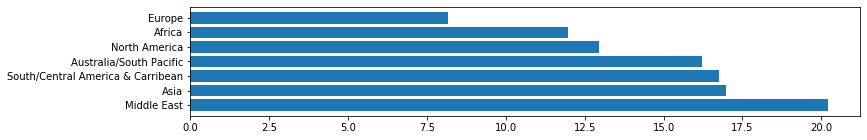

In [166]:
plt.barh(city_temperature_meant['Region'], city_temperature_meant['AvgTemperatureC'])

Оказывается, на Среднем Востоке в среднем почти вдвое жарче, чем в Африке!!!

Посмотрим, как изменялась средняя температура в этих регионах по годам

In [167]:
city_temperature.Region.unique()

array(['Africa', 'Asia', 'Australia/South Pacific', 'Europe',
       'Middle East', 'North America',
       'South/Central America & Carribean'], dtype=object)

In [168]:
city_temperature = city_temperature[city_temperature['Year'] != 200]
city_temperature = city_temperature[city_temperature['Year'] != 201]


In [169]:
city_temperature_y = city_temperature.pivot_table(
                        index='Year', 
                        columns='Region', 
                        values='AvgTemperatureC', 
                        aggfunc='mean').fillna(0).applymap(float)

city_temperature_y

Region,Africa,Asia,Australia/South Pacific,Europe,Middle East,North America,South/Central America & Carribean
Year,,,,,,,
1995,11.653472,10.657956,16.181342,3.685624,13.008888,12.713475,2.362307
1996,9.082088,15.718321,16.006362,2.520702,14.019539,10.595011,12.036088
1997,2.934279,14.424274,16.431717,5.161948,14.777552,12.108807,12.843024
1998,-0.929962,12.075735,9.575977,4.964489,14.720628,12.509847,9.736766
1999,1.196068,13.108270,16.474288,5.694540,15.378450,13.136399,14.680455
2000,-0.969161,12.287807,16.547158,8.011956,15.672865,12.824890,16.160543
2001,3.969642,15.873163,16.283032,7.178908,22.610284,13.286570,18.017086
2002,1.128458,15.325105,15.167749,6.572910,21.667049,11.870668,17.168785
2003,1.266464,17.367112,15.781059,6.391123,22.908272,12.513358,15.724867


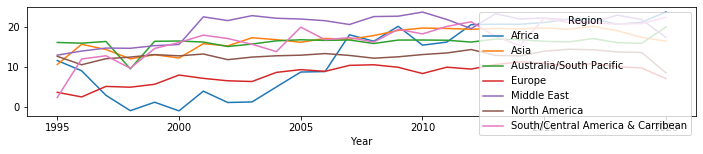

In [170]:
# построим график
city_temperature_y.plot()

**График** отлично визуализирует динамику средних температур по годам в различных регионах. Явно виден "провал" температур в Африке в период с 1995 по 2005 годы, а вот на Среднем Востоке в это время наблюдается рост средних показателей. Удивительно, что динамики температур в Азии и Австралии довольно близки друг другу. И в целом по миру видно, что средняя температура по году имеет тенденцию к росту.

Построим **heat map** по среднемесячным температурам по регионам, чтобы понять, где в каком месяце комфортнее всего находиться))

In [171]:
city_temperature_r_c = city_temperature.pivot_table(
                        index='Month', 
                        columns='Region', 
                        values='AvgTemperatureC', 
                        aggfunc='mean').fillna(0).applymap(float)

city_temperature_r_c

Region,Africa,Asia,Australia/South Pacific,Europe,Middle East,North America,South/Central America & Carribean
Month,,,,,,,
1,11.259989,7.851066,21.928435,-0.608548,10.727999,1.545453,17.469248
2,12.076552,9.832459,21.773460,0.834297,12.190293,3.380250,17.513446
3,12.757806,13.654196,20.198919,3.708614,15.730373,7.554129,17.349069
4,12.740909,18.408665,17.085056,7.855329,19.648232,12.336557,17.193310
5,12.315329,20.896872,13.716387,11.561368,24.245217,17.435690,16.303413
6,12.471956,22.757795,11.461491,15.207376,26.912755,21.277805,15.755454
7,12.138357,24.811464,11.080830,17.602867,28.498285,24.234013,16.430120
8,11.998963,23.888423,11.443191,17.292321,28.503567,23.401064,16.733808
9,12.295489,21.754538,13.169382,13.220361,25.665814,19.883163,16.583960


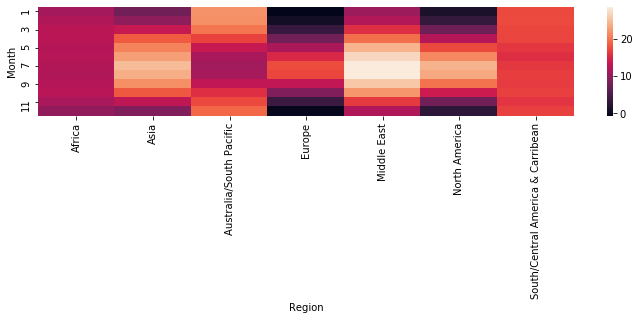

In [172]:
import seaborn as sns
ax = sns.heatmap(city_temperature_r_c)

Самый большой перепад температур в течение года наблюдается в Северной Америке, а на Карибских Островах самый мягкий климат))
Ещё сразу видно, что в Австралии "всё наоборот" - ведь она расположена в другом полушарии! А Азия - словно её зеркальное отражение (в предыдущем иследовании мы увидели, что в среднем по году в динамике они ближе всего друг другу)

Узнаем, какой разброс температур по году во всех регионах. Построим **boxplot**

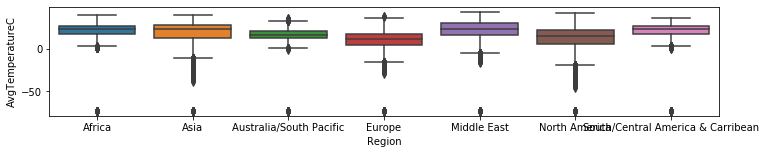

In [173]:
city_temperature_top = city_temperature.Region.value_counts().sort_values(ascending = False).index.values
city_temperature_top
ax = sns.boxplot(x="Region", y="AvgTemperatureC", 
            data=city_temperature[city_temperature.Region.isin(city_temperature_top)])

Видим какие-то странные аномалии в данных. Много точек с температурой ниже -50 градусов, даже в тёплых регионах, которых быть не должно, и которые искажают данные.

Удалим подобные аномалии.

In [175]:
city_temperature = city_temperature[city_temperature['AvgTemperatureC'] > -50]

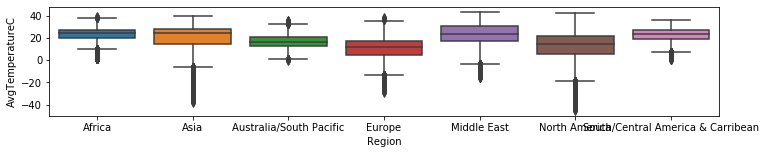

In [176]:
city_temperature_top = city_temperature.Region.value_counts().sort_values(ascending = False).index.values
city_temperature_top
ax = sns.boxplot(x="Region", y="AvgTemperatureC", 
            data=city_temperature[city_temperature.Region.isin(city_temperature_top)])

Теперь наши данные выглядят более правдоподобно. В северной америке и в азии большой разброс температур, что вызвано континентальным климатом. Африка, Карибы и Австралия показали наименьший разброс.

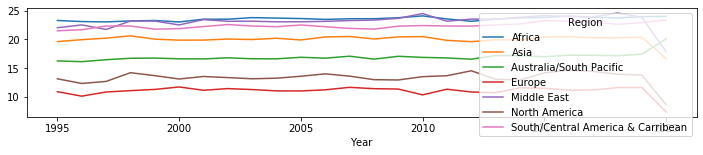

In [177]:
city_temperature_y = city_temperature.pivot_table(
                        index='Year', 
                        columns='Region', 
                        values='AvgTemperatureC', 
                        aggfunc='mean').fillna(0).applymap(float)
city_temperature_y.plot()

Мы видим, что наши графики стали более "спокойными", и Африка поднялась на уровень Среднего Востока. Но небольшая тенденция к росту температур сохранилась. Интересно, что в 2010 году в Европе наблюдалось снижение температуры, а на Среднем Востоке был симметричный скачок (кстати, в этом году в Москве было аномально жаркое лето - возможно, её в этом году зацепил антициклон со Среднего Востока??).

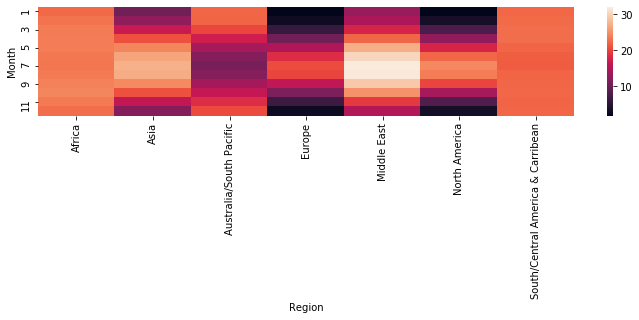

In [178]:
city_temperature_r_c = city_temperature.pivot_table(
                        index='Month', 
                        columns='Region', 
                        values='AvgTemperatureC', 
                        aggfunc='mean').fillna(0).applymap(float)
ax = sns.heatmap(city_temperature_r_c)

Тепловая карта практически не изменилась, но данные по Африке выглядят более достоверно.

<BarContainer object of 7 artists>

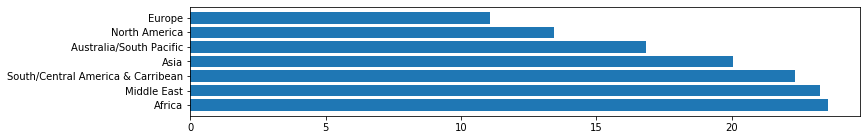

In [179]:
city_temperature_meant = city_temperature.groupby('Region')[['AvgTemperatureC']].mean()\
    .sort_values('AvgTemperatureC', ascending=False).reset_index()
plt.barh(city_temperature_meant['Region'], city_temperature_meant['AvgTemperatureC'])

И теперь на столбчатой диаграмме мы видим, что Африка, как ей и положено, заняла почётное место самого жаркого места на планете!!!

Теперь узнаем, какая в целом температура на нашей планете согласно статистике. Построим **distplot**

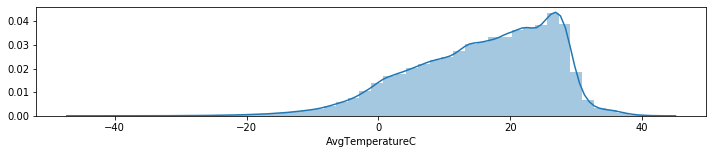

In [180]:
sns.distplot(city_temperature.AvgTemperatureC)

Мы видим, что температура имеет номальное распределение, смещённое вправо, и больше всего дней за нашу историю наблюдений имела место температура около 30 градусов, что не может не радовать!!!